**Aim**:
To classify/predict whether a patient is prone to diabetes relied on multiple factors

**Main contents:**
- Data Information
- Data exploration
- Model fitting

**What I use:**
- Data visulization
- Statistical analysis: logistic regression model, KNN, Ensemble voting classifier

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from skimpy import clean_columns
from wordcloud import WordCloud
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

**DATA INFORMATION**

In [98]:
df_diabetes = pd.read_csv('diabetes_india.csv')
print("Total row and column in the dataset:", df_diabetes.shape)

Total row and column in the dataset: (768, 9)


In [68]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [69]:
Age = df_diabetes['Age']
BloodPressure = df_diabetes['BloodPressure']
Glucose = df_diabetes['Glucose']
SkinThickness = df_diabetes['SkinThickness']
Insulin = df_diabetes['Insulin']
BMI = df_diabetes['BMI']
Outcome = df_diabetes['Outcome']

In [70]:
df_diabetes = df_diabetes.rename(columns={"DiabetesPedigreeFunction" : "DPF", "BloodPressure" : "Blood Pressure", "SkinThickness" : "Skin Thickness"})

**DATA EXPLORATION**

**Correlation - heatmap - data discribe**

In [71]:
#Check correlation of the features collumn
df_diabetes.corr().style.background_gradient(cmap='RdBu')

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Blood Pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin Thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DPF,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


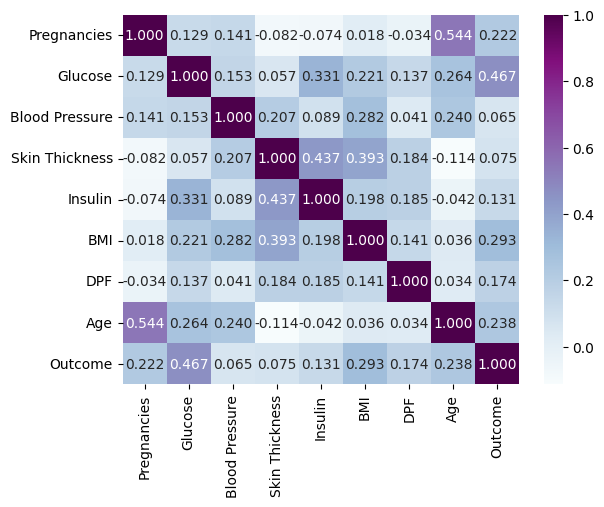

In [72]:
#plot heatmap
heatmap = sns.heatmap(df_diabetes.corr(), cmap="BuPu", annot=True, fmt=".3f")

In [73]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Blood Pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin Thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Compare attributes between diabetes and non-diabetic**

Numerical vs Categorical distributes

In [74]:
#Divided all features in dataframe into categorical and numerical features
col = list(df_diabetes.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df_diabetes[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Outcome
Numerical Features : Pregnancies Glucose Blood Pressure Skin Thickness Insulin BMI DPF Age


Distribution of categorical features

c:\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
c:\python37\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


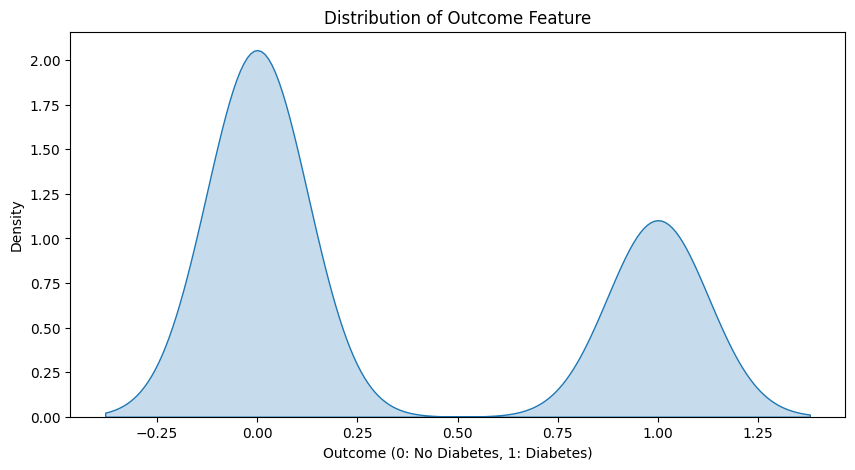

In [75]:
plt.figure(figsize=(10,5))
sns.distplot(df_diabetes['Outcome'], hist=False, kde=True, kde_kws={'shade': True})
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Density')
plt.title('Distribution of Outcome Feature')
plt.show()

Distribution of Numerical features

c:\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":
c:\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":
c:\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning

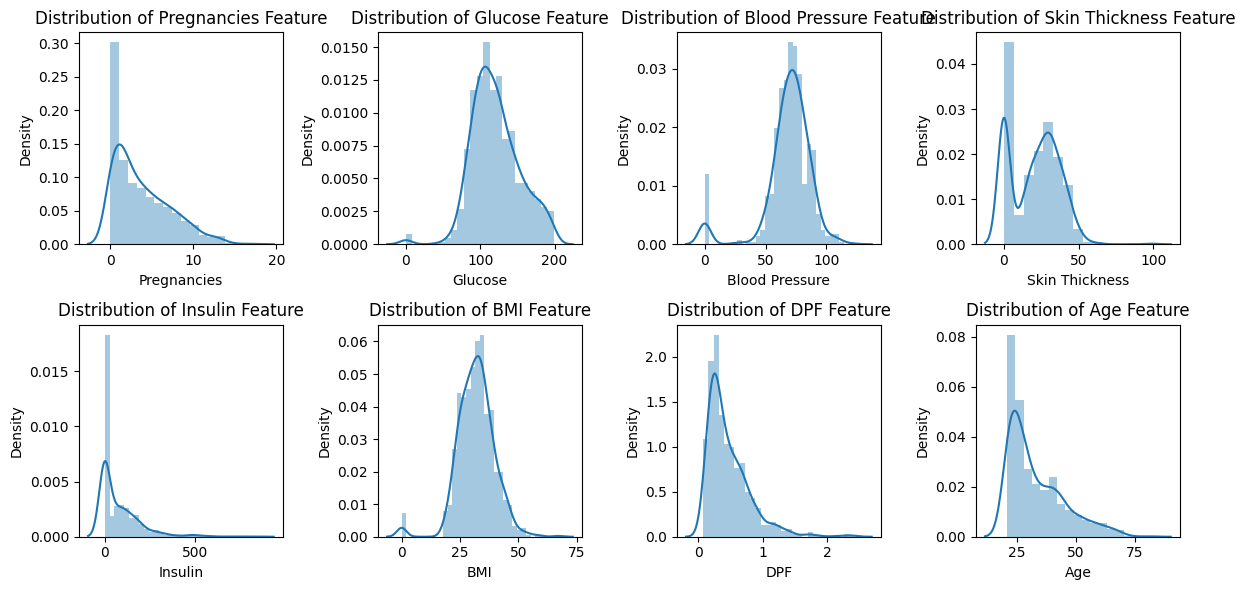

In [76]:
# List of numerical features
numerical_features = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'DPF', 'Age']

# Plot the distributions of each numerical feature
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    row = i // 4
    col = i % 4
    sns.distplot(df_diabetes[feature], kde=True, ax=ax[row][col])
    ax[row][col].set_xlabel(feature)
    ax[row][col].set_ylabel('Density')
    ax[row][col].set_title(f'Distribution of {feature} Feature')
plt.tight_layout()
plt.show()


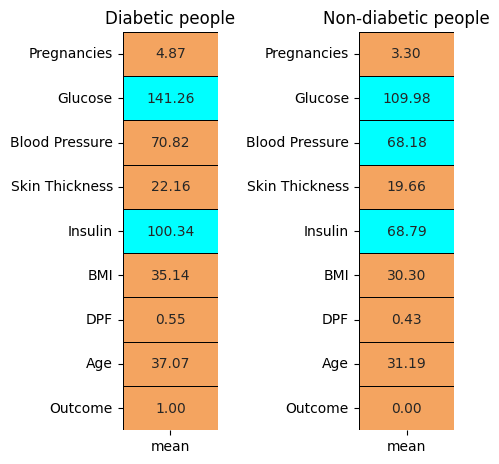

In [77]:
yes = df_diabetes[df_diabetes['Outcome'] == 1].describe().T
no = df_diabetes[df_diabetes['Outcome'] == 0].describe().T
colors = ['sandybrown','cyan']

fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(5,5))
plt.subplot(1,2,1)

sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Diabetic people');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Non-diabetic people');

fig.tight_layout(pad = 2)

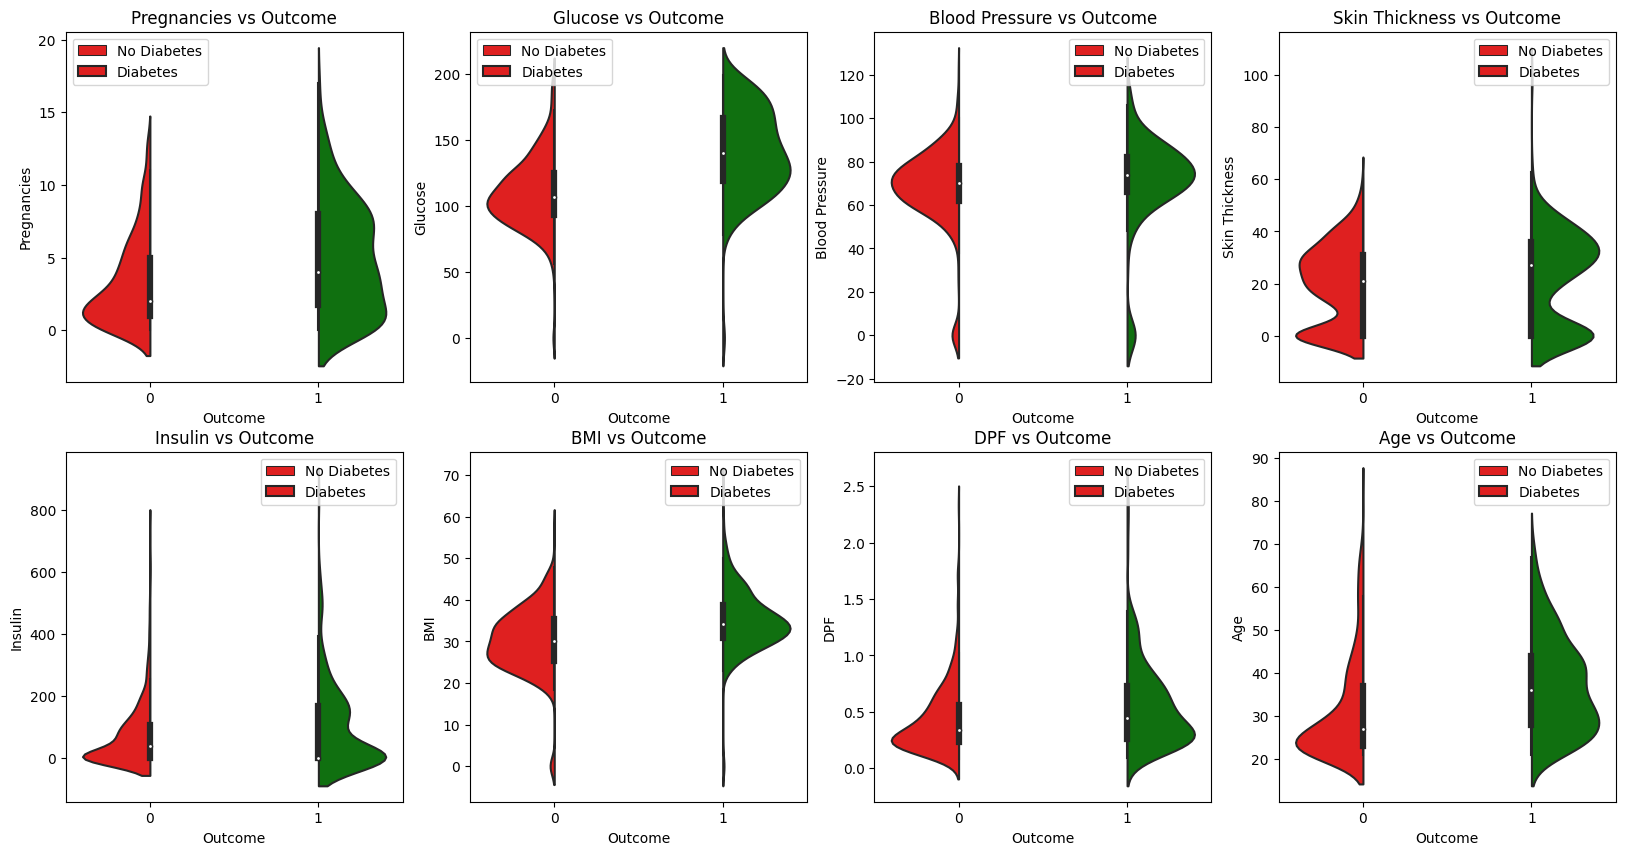

In [78]:
numerical_features = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'DPF', 'Age']
colors = ['red','green']
fig, ax = plt.subplots(nrows = 2,ncols = 4,figsize = (20,10))

for i in range(len(numerical_features)):
    plt.subplot(2,4,i+1)
    ax = sns.violinplot(x = "Outcome", y = numerical_features[i], data = df_diabetes, hue = "Outcome", split = True, palette = colors, edgecolor = 'black')
    plt.xlabel('Outcome')
    plt.ylabel(numerical_features[i])
    title = numerical_features[i] + ' vs Outcome'
    plt.legend(['No Diabetes','Diabetes'])
    plt.title(title)


- Women who is closed the later stages of pregnancy are at a higher risk of developing gestaional diabetes. The hormonal changes that occur during pregnancy can also affect a woman's glucose metabolism, increasing the risk of diabetes. It is important for women to undergo regular glucose testing during pregnancy to detect and manage gestational diabetes, as uncontrolled diabetes can harm both the mother and the baby.
- When glucose levels in the blood are consistently higher than normal, it's a telltale sign that the body may be struggling to regulate blood sugar levels. This elevated glucose in the blood is a key indicator of a potential risk for developing diabetes, as it signals that the body is not effectively utilizing insulin or producing enough of it. Diabetic people has higher glucose index in blood test than non-diabetic people.
- In addition, diabetic people have thicker skin, higher insulin, higher BMI and DPF than non-diabetic people. 
- In the observation, the age of diabetic people are higher than non-diabetic people.

**MODEL FITTING**

**Logistic regression**

In [79]:
df_diabetes.head(1)

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [80]:
features = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'BMI', 'Insulin', 'DPF', 'Age']
label = 'Outcome'
X,y = df_diabetes[features].values, df_diabetes[label].values

for n in range(0,4):
    print("Outcome", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Outcome 1 
  Features: [6.0, 148.0, 72.0, 35.0, 33.6, 0.0, 0.627, 50.0] 
  Label: 1
Outcome 2 
  Features: [1.0, 85.0, 66.0, 29.0, 26.6, 0.0, 0.351, 31.0] 
  Label: 0
Outcome 3 
  Features: [8.0, 183.0, 64.0, 0.0, 23.3, 0.0, 0.672, 32.0] 
  Label: 1
Outcome 4 
  Features: [1.0, 89.0, 66.0, 23.0, 28.1, 94.0, 0.167, 21.0] 
  Label: 0


In [81]:
#split data into train and test set with the following proportion 70 - 30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 537
Test cases: 231


Train and Evaluate a Binary Classification Model

In [82]:
#train the model
from sklearn.linear_model import LogisticRegression

#set regularization rate
reg = 0.01

#train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
model

LogisticRegression(C=100.0, solver='liblinear')

In [83]:
#using the model to predict lables for test set

predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0]
Actual labels:     [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0]


In [84]:
#check the accuracy of the predictions
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7792207792207793


**Perform classification with alternative metrics**

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [86]:
#using the precision_score and recall_score

from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7090909090909091
Overall Recall: 0.527027027027027


In [87]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[141  16]
 [ 35  39]]


In [88]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.04268451 0.95731549]
 [0.84170653 0.15829347]
 [0.91596749 0.08403251]
 [0.35730166 0.64269834]
 [0.88768524 0.11231476]
 [0.96461578 0.03538422]
 [0.2641255  0.7358745 ]
 [0.14355093 0.85644907]
 [0.65129006 0.34870994]
 [0.61047523 0.38952477]
 [0.4347086  0.5652914 ]
 [0.03778997 0.96221003]
 [0.71278573 0.28721427]
 [0.85123774 0.14876226]
 [0.88030043 0.11969957]
 [0.84829169 0.15170831]
 [0.13779008 0.86220992]
 [0.97670594 0.02329406]
 [0.54061114 0.45938886]
 [0.76071117 0.23928883]
 [0.33202718 0.66797282]
 [0.60416865 0.39583135]
 [0.8144612  0.1855388 ]
 [0.93175599 0.06824401]
 [0.9540242  0.0459758 ]
 [0.65578078 0.34421922]
 [0.95871353 0.04128647]
 [0.09301305 0.90698695]
 [0.89506444 0.10493556]
 [0.86799184 0.13200816]
 [0.5312186  0.4687814 ]
 [0.75519883 0.24480117]
 [0.90923305 0.09076695]
 [0.55662641 0.44337359]
 [0.90783385 0.09216615]
 [0.28926189 0.71073811]
 [0.53647767 0.46352233]
 [0.91811086 0.08188914]
 [0.6730139  0.3269861 ]
 [0.26316189 0.73683811]


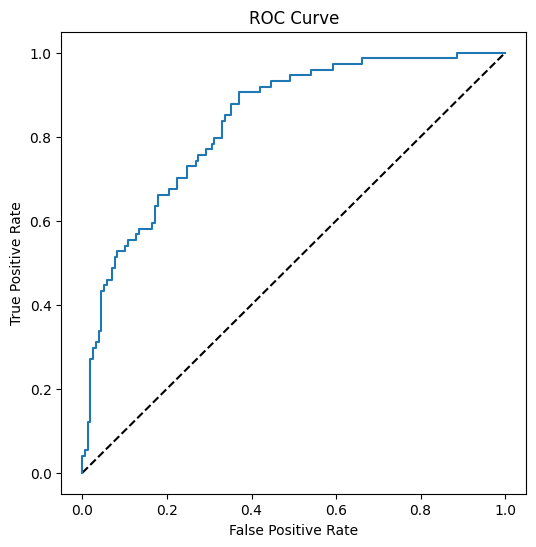

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [90]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8357720778102944


**Perform a preprocessing in a pipeline**

In [91]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


**Use trained model**

In [95]:
import joblib

# Save the model as a pickle file
filename = './diabetes_india_model.pkl'
joblib.dump(model, filename)

['./diabetes_india_model.pkl']

In [96]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[6,148,72,35,0,33.6,0.627,50]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]
Predicted class is 1
